In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import pickle
import os

##### KNN classs-reg beklentileri
- `fit`
- `predict`, birden fazla nokta için tahmin etme
- `score`
- `predict_proba`
- `getparams`

### KNN Regressor

In [2]:
class KNN:
    def __init__ (self, k, p, weight = "uniform"):
        self.k = k
        self.p = p
        self.weight = weight

        
    def fit(self, X, y):
        self.X = X
        self.y = y
        
    def predict(self, X_test):
        
        X1 = self.X.reshape(*self.X.shape, 1)
        X_test1 = X_test.T.reshape(1, X_test.shape[1],X_test.shape[0])
        
        distance = ((np.abs(X_test1 - X1))**self.p).sum(axis=1)**(1/self.p)
#         sıra_no = np.argpartition(distance, self.k, axis= 0)[:self.k, :]
        sıra_no = np.argsort(distance, axis= 0)
        
        if self.weight == "uniform":
            return self.y[sıra_no][:self.k, :].mean(axis=0)
        
        elif self.weight == "distance":
            d2 = distance.copy()
            d2.sort(axis=0)
            return (1 /d2[:self.k] * self.y[sıra_no][:self.k, :]).sum(axis=0) / (1/ d2[:self.k]).sum(axis=0)
        
        else:
            raise ValueError("Geçersiz ağırlık seçimi")
            
    def score(self, X, y):
        y_pred = self.predict(X)
        sum_of_squared_residuals = ((y_pred - y)**2).sum()
        sum_of_squared_error_from_mean = ((y - y.mean())**2).sum()
        
        return 1 - (sum_of_squared_residuals / sum_of_squared_error_from_mean)
        

In [3]:
%%timeit
X, y = make_regression(n_samples=1599, n_features=8, random_state=42)
model = KNN(4,2, weight="uniform")
model.fit(X, y)
score = model.score(X, y)

772 ms ± 62.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
%%time
X, y = make_regression(n_samples=1599, n_features=8, random_state=42)
model = KNN(4,2, weight="uniform")
model.fit(X, y)
score = model.score(X, y)
sk_knn_score = KNeighborsRegressor(n_neighbors=4, p=2).fit(X, y).score(X, y)
print('Custom model score:', score)
print('Sklearn KNN score:', sk_knn_score)
assert np.abs(score - sk_knn_score) <= 1e-5, "Custom KNN yielded a different score."

Custom model score: 0.9095368301637279
Sklearn KNN score: 0.9095368301637279
Wall time: 890 ms


## Drawbacks of KNN

### 1. Not memory efficient.

KNN algorithm requires a copy of the training dataset for making predictions.

In [22]:
X, y = make_regression(n_samples=90000, n_features=20)
pd.DataFrame(X).to_csv('KNN_training_data.csv', index=False)
!ls -ltrh

total 51M
-rw-r--r-- 1 pc 197121 36K Haz 27 15:51 KNN Regression_Apo 27.06.2020.ipynb
-rw-r--r-- 1 pc 197121 25K Haz 29 05:40 KNN Regression 27.06.2020.ipynb
-rw-r--r-- 1 pc 197121 17M Haz 29 05:50 KNN_trained_model.pk
-rw-r--r-- 1 pc 197121 819 Haz 29 05:50 KNN_vs_liner_trained_model.pk
-rw-r--r-- 1 pc 197121 71K Haz 29 05:58 KNN Regression_Å�Ã¼krÃ¼ 29.06.2020.ipynb
-rw-r--r-- 1 pc 197121 34M Haz 29 06:01 KNN_training_data.csv


In [23]:
model = KNeighborsRegressor(algorithm="kd_tree").fit(X, y)
pickle.dump(model, open('KNN_trained_model.pk', 'wb'))
!ls -ltrh

total 51M
-rw-r--r-- 1 pc 197121 36K Haz 27 15:51 KNN Regression_Apo 27.06.2020.ipynb
-rw-r--r-- 1 pc 197121 25K Haz 29 05:40 KNN Regression 27.06.2020.ipynb
-rw-r--r-- 1 pc 197121 819 Haz 29 05:50 KNN_vs_liner_trained_model.pk
-rw-r--r-- 1 pc 197121 34M Haz 29 06:01 KNN_training_data.csv
-rw-r--r-- 1 pc 197121 71K Haz 29 06:02 KNN Regression_Å�Ã¼krÃ¼ 29.06.2020.ipynb
-rw-r--r-- 1 pc 197121 17M Haz 29 06:02 KNN_trained_model.pk


In [7]:
model = LinearRegression().fit(X, y)
pickle.dump(model, open('KNN_vs_liner_trained_model.pk', 'wb'))
!ls -ltrh

total 51M
-rw-r--r-- 1 pc 197121 36K Haz 27 15:51 KNN Regression_Apo 27.06.2020.ipynb
-rw-r--r-- 1 pc 197121 25K Haz 29 05:40 KNN Regression 27.06.2020.ipynb
-rw-r--r-- 1 pc 197121 17K Haz 29 05:48 KNN Regression_Å�Ã¼krÃ¼ 29.06.2020.ipynb
-rw-r--r-- 1 pc 197121 34M Haz 29 05:50 KNN_training_data.csv
-rw-r--r-- 1 pc 197121 17M Haz 29 05:50 KNN_trained_model.pk
-rw-r--r-- 1 pc 197121 819 Haz 29 05:50 KNN_vs_liner_trained_model.pk


### 2. Long prediction time

In [24]:
X, y = make_regression(n_samples=9000, n_features=20)

In [29]:
%%time
KNeighborsRegressor(n_neighbors=3,algorithm="ball_tree").fit(X, y) # algorithm= "kd_tree,brute"

Wall time: 61 ms


KNeighborsRegressor(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [30]:
%%time
KNeighborsRegressor(n_neighbors=3).fit(X, y).predict(X) # predict çok uzun sürüyor.

Wall time: 5.55 s


array([  -4.57248486,   44.16151272, -188.9775866 , ...,  103.7739963 ,
        217.70547572,    5.17859746])

In [31]:
%%timeit
LinearRegression().fit(X, y).predict(X)

8.03 ms ± 55.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### 3. Curse of Dimensionality

KNN is heavily affected from the fact that as the dimensionality of the dataset increase, more data is required to cover the same percentage of space.

In [11]:
from sklearn.model_selection import train_test_split

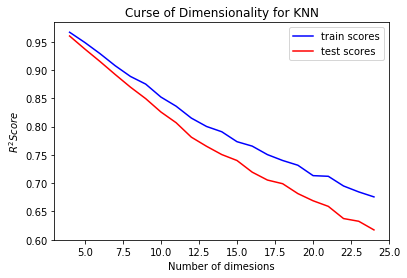

In [12]:
train_scores = []
test_scores = []

num_features = range(4, 25)
for d in num_features:
    this_train = []
    this_test = []
    for i in range(10):
        X, y = make_regression(n_samples=2000, n_features=d)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        model = KNeighborsRegressor(n_neighbors=13)
        model.fit(X_train, y_train)
        this_train.append(model.score(X_train, y_train))
        this_test.append(model.score(X_test, y_test))
    train_scores.append(np.mean(this_train))
    test_scores.append(np.mean(this_test))
    
plt.plot(num_features, train_scores, label='train scores', color='blue')
plt.plot(num_features, test_scores, label='test scores', color='red')
plt.title('Curse of Dimensionality for KNN')
plt.xlabel('Number of dimesions')
plt.ylabel('$R^2 Score$')
_ = plt.legend()

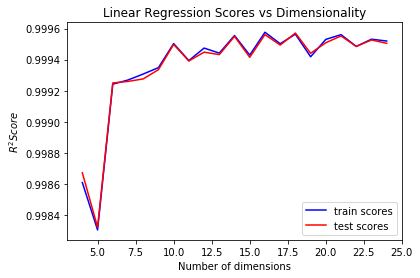

In [13]:
train_scores = []
test_scores = []

num_features = range(4, 25)
for d in num_features:
    this_train = []
    this_test = []
    for i in range(10):
        X, y = make_regression(n_samples=2000, n_features=d, noise=4.0)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        model = LinearRegression()
        model.fit(X_train, y_train)
        this_train.append(model.score(X_train, y_train))
        this_test.append(model.score(X_test, y_test))
    train_scores.append(np.mean(this_train))
    test_scores.append(np.mean(this_test))
    
plt.plot(num_features, train_scores, label='train scores', color='blue')
plt.plot(num_features, test_scores, label='test scores', color='red')
plt.title('Linear Regression Scores vs Dimensionality')
plt.xlabel('Number of dimensions')
plt.ylabel('$R^2 Score$')
plt.legend()

In [14]:
%%time
model2 = KNeighborsRegressor(n_neighbors=4,weights="distance", algorithm = 'brute' )
# model1 = KNN(4,2, weight="distance")
model2.fit(X, y_train)
model2.predict(X)

ValueError: Found input variables with inconsistent numbers of samples: [2000, 1600]

In [15]:
a = np.array([[1,2,3]]).reshape(3,1)

In [16]:
a

array([[1],
       [2],
       [3]])

In [17]:
b = np.array([[2,4,6]]).reshape(1,3)

In [18]:
a-b

array([[-1, -3, -5],
       [ 0, -2, -4],
       [ 1, -1, -3]])

In [19]:
a@b

array([[ 2,  4,  6],
       [ 4,  8, 12],
       [ 6, 12, 18]])

In [20]:
a*b

array([[ 2,  4,  6],
       [ 4,  8, 12],
       [ 6, 12, 18]])

In [21]:
np.array([[2,4,6]]).reshape(9,2)

ValueError: cannot reshape array of size 3 into shape (9,2)

In [ ]:
X = np.random.randn(9,2)
X1 = X.reshape(9,2,1)
X_test = np.random.randn(4,2)
X_test1= X_test.T.reshape(1,2,4)
y_train = np.random.randn(9)

In [ ]:
(X_test1 - X1).shape

In [ ]:
p=1
distance = ((np.abs(X_test1 - X1))**p).sum(axis=1)**(1/p)
pd.DataFrame(distance)

In [ ]:
X_test[2] - X[4]

In [ ]:
X_df = pd.DataFrame(X)
X_df["y_train"] = y_train

In [ ]:
X_df

In [ ]:
k=3
sıra_no = np.argsort(distance, axis= 0)
y_train[sıra_no][:k, :].mean(axis=0)

In [ ]:
d2 = distance.copy()
d2.sort(axis=0)
(1 /d2[:k] * y_train[sıra_no][:k, :]).sum(axis=0) / (1/ d2[:k]).sum(axis=0)

#### Sağlaması

In [ ]:
model=KNeighborsRegressor(n_neighbors=3, p=1, weights="distance")
model.fit(X, y_train)
model.predict(X_test)

In [ ]:
sıra_no

In [ ]:
 np.argsort(distance, axis= 0)

In [ ]:
for i in X_test:
    